# Data Science Project
## Title: Data-Driven Taxi fare prediction based on weather condition

###  Checks whether the current environment is connected to a GPU (Graphics Processing Unit) and provides information about the GPU if available.

In [75]:
# Run the 'nvidia-smi' command to obtain GPU information
gpu_info = !nvidia-smi
# Join the lines of GPU information into a single string
gpu_info = '\n'.join(gpu_info)
# Check if the string 'failed' is present in the GPU information
if gpu_info.find('failed') >= 0:
  # If 'failed' is found, print a message indicating no GPU connection
  print('Not connected to a GPU')
else:
  # If 'failed' is not found, print the GPU information
  print(gpu_info)

Mon Dec 11 10:45:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Checks the available RAM (Random Access Memory) in the current runtime environment and prints a message based on the amount of available RAM.

In [76]:
# Import the virtual_memory function from the psutil library
from psutil import virtual_memory

# Get the total available RAM in gigabytes
ram_gb = virtual_memory().total / 1e9

# Print a message indicating the amount of available RAM
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# Check if the available RAM is less than 20 gigabytes
if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


## 1. Data Preprocessing
### 1.1 Weather Dataset [From 2022.01.01 to 2022.12.31]

In [34]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the pyarrow.parquet library for working with Parquet files
import pyarrow.parquet as pq

# Importing the numpy library for numerical operations
import numpy as np

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing the matplotlib.pyplot library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

In [35]:
# Reading a CSV file named "New York 2022-01-01 to 2022-12-31.csv" into a Pandas DataFrame
df_weather_origin = pd.read_csv("New York 2022-01-01 to 2022-12-31.csv")

In [ ]:
df_weather_origin.head() # Displaying the first few rows of df_weather_origin

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,New York,2022-01-01,13.5,10.0,11.6,13.5,10.0,11.6,10.2,91.6,...,1.3,1,NaN,2022-01-01T07:20:13,2022-01-01T16:39:22,0.96,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72505394728,KLGA,F8726,KNYC,F1417,72503014732"
1,New York,2022-01-02,14.7,3.6,10.2,14.7,0.2,9.4,7.5,83.8,...,2.1,2,NaN,2022-01-02T07:20:18,2022-01-02T16:40:13,0.00,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72505394728,KLGA,KNYC,F1417,72503014732"
2,New York,2022-01-03,3.3,-4.7,-1.0,-0.1,-10.8,-6.2,-10.4,49.9,...,1.1,1,NaN,2022-01-03T07:20:21,2022-01-03T16:41:06,0.03,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,F1417,72503014732"
3,New York,2022-01-04,1.3,-6.9,-2.6,0.2,-13.9,-6.5,-12.1,49.1,...,9.1,5,NaN,2022-01-04T07:20:22,2022-01-04T16:42:00,0.06,Clear,Clear conditions throughout the day.,clear-day,"72505394728,KLGA,F8726,KNYC,F1417,72503014732"
4,New York,2022-01-05,8.1,-0.5,4.2,7.2,-3.7,2.0,0.4,77.0,...,2.1,1,NaN,2022-01-05T07:20:20,2022-01-05T16:42:56,0.10,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72505394728,KLGA,KNYC,F1417,72503014732"


In [ ]:
df_weather_origin.shape # shape of original dataset

(365, 33)

### Drop the irrelevant and duplicate columns

In [36]:
# Dropping specified columns from the original weather DataFrame
df_weather_origin.drop(columns=['name', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
                                'humidity', 'precipprob', 'preciptype', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                                'visibility', 'uvindex', 'severerisk','sunrise', 'sunset', 'moonphase', 'conditions','description','stations', 'solarradiation', 'solarenergy', 'cloudcover', 'precipcover', 'snowdepth'], inplace=True)
# Resetting the index of the DataFrame after dropping columns
df_weather = df_weather_origin.reset_index(drop=True)

In [ ]:
df_weather.head() # Displaying the first few rows of df_weather_origin after dropping irrelevant and duplicate columns

,datetime,temp,precip,snow,icon
0,2022-01-01,11.6,18.463,0.0,rain
1,2022-01-02,10.2,2.318,0.0,rain
2,2022-01-03,-1.0,0.000,0.0,partly-cloudy-day
3,2022-01-04,-2.6,0.000,0.0,clear-day
4,2022-01-05,4.2,5.745,0.0,rain


### 1.2 Yellow Taxi Dataset [From 2022.01.01 to 2022.12.31]

In [37]:
# Reading Parquet files for taxi trip data for each month into Pandas DataFrames
df_taxi_jan = pq.read_table("yellow_tripdata_2022-01.parquet").to_pandas()
df_taxi_feb = pq.read_table("yellow_tripdata_2022-02.parquet").to_pandas()
df_taxi_mar = pq.read_table("yellow_tripdata_2022-03.parquet").to_pandas()
df_taxi_apr = pq.read_table("yellow_tripdata_2022-04.parquet").to_pandas()
df_taxi_may = pq.read_table("yellow_tripdata_2022-05.parquet").to_pandas()
df_taxi_june = pq.read_table("yellow_tripdata_2022-06.parquet").to_pandas()
df_taxi_july = pq.read_table("yellow_tripdata_2022-07.parquet").to_pandas()
df_taxi_aug = pq.read_table("yellow_tripdata_2022-08.parquet").to_pandas()
df_taxi_sep = pq.read_table("yellow_tripdata_2022-09.parquet").to_pandas()
df_taxi_oct = pq.read_table("yellow_tripdata_2022-10.parquet").to_pandas()
df_taxi_nov = pq.read_table("yellow_tripdata_2022-11.parquet").to_pandas()
df_taxi_dec = pq.read_table("yellow_tripdata_2022-12.parquet").to_pandas()

In [ ]:
# Displaying the first few rows of the DataFrame df_taxi_dec (ex. December) to see how dataset looks like
df_taxi_dec.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,8.5,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,26.0,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,5.0,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,10.0,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,5.0,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00


In [ ]:
df_taxi_dec.shape # Retrieving the dimensions (number of rows and columns) of the DataFrame df_taxi_dec (December) to see the shape how it looks like

(3399549, 19)

### Integrate all months of taxi dataset into one dataframe

In [38]:
# Creating a list containing DataFrames for taxi trip data for each month
all_months = [df_taxi_jan, df_taxi_feb, df_taxi_mar, df_taxi_apr, df_taxi_may, df_taxi_june, df_taxi_july, df_taxi_aug,
              df_taxi_sep, df_taxi_oct, df_taxi_nov, df_taxi_dec]

# Concatenating the list of DataFrames along axis 0 (rows), creating a single DataFrame
df_taxi_origin = pd.concat(all_months, axis=0)

# Resetting the index of the concatenated DataFrame
df_taxi_origin= df_taxi_origin.reset_index(drop=True)

In [ ]:
df_taxi_origin.head() # Entire Yellow Taxi Dataset after integrating all months; Displaying the first few rows of df_taxi_origin

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [ ]:
df_taxi_origin.shape

(39656098, 19)

### Create "new_taxi" dataset to drop the time series in the dataset and merge it with weather dataset

#### Align the features between two dataset

In [39]:
# Creating a new DataFrame 'new_taxi' based on the original DataFrame 'df_taxi_origin'
new_taxi = df_taxi_origin.assign(
    # Extracting the date part of the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns
    pickup_date = pd.to_datetime(df_taxi_origin['tpep_pickup_datetime']).dt.date,
    dropoff_date = pd.to_datetime(df_taxi_origin['tpep_dropoff_datetime']).dt.date
)
# Creating a new column 'taxes' by summing various fee-related columns
new_taxi['taxes'] = new_taxi['extra'] + new_taxi['mta_tax'] + new_taxi['tolls_amount'] + new_taxi['improvement_surcharge'] + new_taxi['airport_fee'] + new_taxi['congestion_surcharge']

# Dropping specified columns from the DataFrame 'new_taxi'
new_taxi.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID',
                       'store_and_fwd_flag','payment_type','passenger_count', 'extra', 'mta_tax', 'improvement_surcharge',
                       'tolls_amount', 'congestion_surcharge', 'airport_fee' ], inplace=True)

In [ ]:
# Retrieving the dimensions (number of rows and columns) of the DataFrame new_taxi
new_taxi.shape

(39656098, 10)

### Downsample the dataset to reduce the size

In [40]:
# Setting the downsample percentage to 5%
downsample_percentage = 0.05

# Randomly sampling a fraction of the DataFrame based on the specified percentage
taxi_downsampled = new_taxi.sample(frac=downsample_percentage, random_state=42)

# Resetting the index of the downsampled DataFrame
taxi_downsampled = taxi_downsampled.reset_index(drop=True)

### New Column Order

In [41]:
# List specifying the new order of columns
new_column_order = [
    'VendorID',
    'trip_distance',
    'PULocationID',
    'DOLocationID',
    'fare_amount',
    'taxes',
    'tip_amount',
    'total_amount',
    'pickup_date',
    'dropoff_date'
]
# Reordering columns in the taxi_downsampled DataFrame based on the new_column_order
taxi_downsampled = taxi_downsampled[new_column_order]

In [ ]:
taxi_downsampled # Displaying taxi_downsampled dataset

,VendorID,trip_distance,PULocationID,DOLocationID,fare_amount,taxes,tip_amount,total_amount,pickup_date,dropoff_date
0,2,3.79,13,68,17.00,3.3,4.06,24.36,2022-12-14,2022-12-14
1,2,2.08,48,68,9.50,3.3,2.56,15.36,2022-08-28,2022-08-28
2,2,2.08,233,50,12.00,4.3,2.00,18.30,2022-07-29,2022-07-29
3,2,0.05,158,158,-30.78,NaN,4.33,-23.15,2022-02-14,2022-02-14
4,2,18.24,132,42,52.00,8.6,0.00,60.60,2022-07-26,2022-07-26
...,...,...,...,...,...,...,...,...,...,...
1982800,2,3.88,100,13,21.90,4.0,0.00,25.90,2022-12-20,2022-12-20
1982801,2,0.68,263,236,5.00,3.3,0.00,8.30,2022-04-17,2022-04-17
1982802,1,1.70,237,170,13.00,5.8,0.00,16.30,2022-11-29,2022-11-29
1982803,2,2.12,230,107,9.50,3.8,2.66,15.96,2022-04-19,2022-04-19


In [ ]:
taxi_downsampled.shape # Retrieving the dimensions (number of rows and columns) of the DataFrame taxi_downsampled

(1982805, 10)

### 1.3 Merge Yellow Taxi & Weather Dataset

In [42]:
# Importing necessary libraries
from IPython.lib.display import join
from pyarrow.compute import JoinOptions

# Adding a datetime column to the weather DataFrame
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

# Converting 'pickup_date' column in the taxi_downsampled DataFrame to datetime format
taxi_downsampled['pickup_date'] = pd.to_datetime(taxi_downsampled['pickup_date'])

# Merging the taxi_downsampled DataFrame with the df_weather DataFrame based on the 'pickup_date' and 'datetime' columns
merged_df = pd.merge(taxi_downsampled, df_weather, left_on='pickup_date', right_on='datetime')

In [ ]:
merged_df.head() # After merging two datasets Yellow Taxi & Weather Dataset; Displaying few rows

,VendorID,trip_distance,PULocationID,DOLocationID,fare_amount,taxes,tip_amount,total_amount,pickup_date,dropoff_date,datetime,temp,precip,snow,icon
0,2,3.79,13,68,17.00,3.3,4.06,24.36,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
1,2,4.48,236,107,32.67,NaN,3.60,39.57,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
2,2,1.22,163,142,7.00,3.8,2.16,12.96,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
3,1,0.90,236,237,7.00,5.8,2.55,12.85,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
4,2,21.43,132,239,52.00,15.6,13.27,80.87,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day


In [ ]:
merged_df.shape

(1982777, 15)

## 2. Correlation Heat Map
### Confirm the heatmap to see if there are some correlations among the features

<ipython-input-24-d7c260627d2a>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


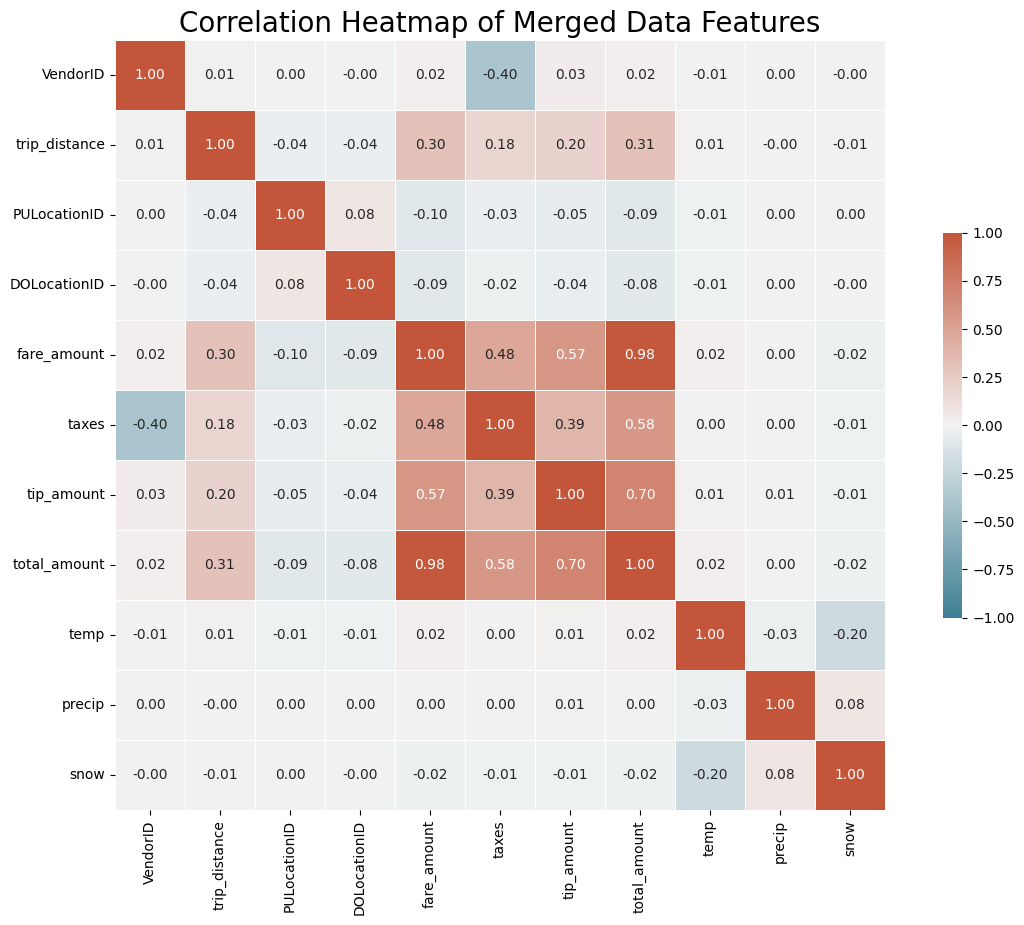

In [ ]:
# Correlation Heat Map
import seaborn as sns
import matplotlib.pyplot as plt

# Drops any rows including Missing Values
merged_df = merged_df.dropna()

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, fmt=".2f", vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Merged Data Features', fontsize=20)
plt.show()

### Let's narrow down to see the detail correlation among 'total_amount', 'trip_distance', 'temp', 'precip', 'snow'

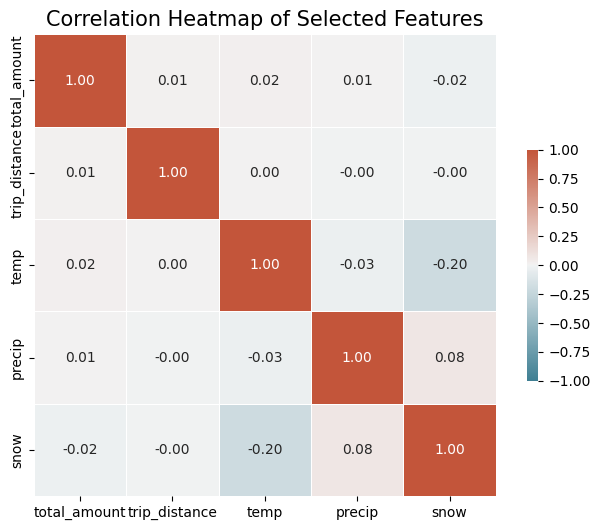

In [12]:
# Selecting specific columns for correlation analysis
selected_columns = ['total_amount', 'trip_distance', 'temp', 'precip', 'snow']
selected_df = merged_df[selected_columns]

# Compute the correlation matrix for the selected columns
correlation_matrix_selected = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_selected, cmap=cmap, fmt=".2f", vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Selected Features', fontsize=15)
plt.show()

### After integrating all the months of Weather data and Yellow Taxi Data, correlation heatmap shows very little correlation between the taxi fares and weather conditions. This is because Pearson Correlation Coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. From this observation, we assumed that [temp, precip, snow] should have quadratic (or more complex) correlation in terms of total amount. This is because [temp, precip, snow] has a seasonality depends on the season [Spring, Summer, Fall, Winter].

### Before we proceed with the further step, we want to confirm again whether the taxi fare really doesn't have any linear correlation. Thus, we decided to use One-Hot-Encoding for 'icon' information (string type), which describes the weather information more in detail.

In [ ]:
merged_df.head() # Displaying the first few rows of the merged DataFrame merged_df

,VendorID,trip_distance,PULocationID,DOLocationID,fare_amount,taxes,tip_amount,total_amount,pickup_date,dropoff_date,datetime,temp,precip,snow,icon
0,2,3.79,13,68,17.0,3.3,4.06,24.36,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
2,2,1.22,163,142,7.0,3.8,2.16,12.96,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
3,1,0.90,236,237,7.0,5.8,2.55,12.85,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
4,2,21.43,132,239,52.0,15.6,13.27,80.87,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day
5,1,3.10,107,141,14.0,6.8,3.65,21.95,2022-12-14,2022-12-14,2022-12-14,1.2,0.0,0.0,clear-day


In [13]:
merged_df.columns # Retrieving the column names of the DataFrame merged_df

Index(['VendorID', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'taxes', 'tip_amount', 'total_amount', 'pickup_date',
       'dropoff_date', 'datetime', 'temp', 'precip', 'snow', 'icon'],
      dtype='object')

## One-Hot-Encoding for "icon" column

In [43]:
# Perform one-hot encoding for the 'icon' column
merged_df_encoded = pd.get_dummies(merged_df, columns=['icon'], prefix='weather')

In [ ]:
# Display the resulting DataFrame
merged_df_encoded.tail()

,VendorID,trip_distance,PULocationID,DOLocationID,fare_amount,taxes,tip_amount,total_amount,pickup_date,dropoff_date,datetime,temp,precip,snow,weather_clear-day,weather_cloudy,weather_partly-cloudy-day,weather_rain,weather_snow
1982772,2,1.92,170,141,8.5,4.3,1.00,13.80,2022-02-02,2022-02-02,2022-02-02,4.1,0.0,0.0,0,0,1,0,0
1982773,2,6.79,186,42,37.5,3.3,3.00,43.80,2022-02-02,2022-02-02,2022-02-02,4.1,0.0,0.0,0,0,1,0,0
1982774,1,2.00,163,90,10.0,6.8,0.00,14.30,2022-02-02,2022-02-02,2022-02-02,4.1,0.0,0.0,0,0,1,0,0
1982775,2,1.63,68,249,9.0,4.3,2.66,15.96,2022-02-02,2022-02-02,2022-02-02,4.1,0.0,0.0,0,0,1,0,0
1982776,1,0.50,24,238,4.5,0.8,5.00,10.30,2022-02-02,2022-02-02,2022-02-02,4.1,0.0,0.0,0,0,1,0,0


### To see the descriptive weather data has some correlation with taxi fare, we implemented One-Hot-Encoding and see the correlation heatmap

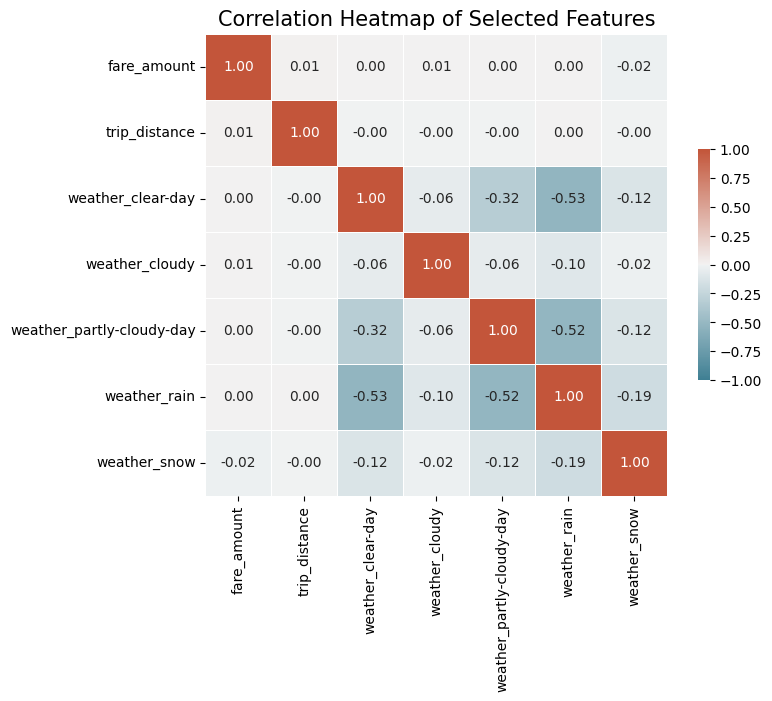

In [15]:
# Selecting specific columns for correlation analysis
selected_columns = ['fare_amount','trip_distance' ,'weather_clear-day', 'weather_cloudy', 'weather_partly-cloudy-day', 'weather_rain', 'weather_snow']
selected_df = merged_df_encoded[selected_columns]

# Compute the correlation matrix for the selected columns
correlation_matrix_selected = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_selected, cmap=cmap, fmt=".2f", vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Selected Features', fontsize=15)
plt.show()

### 'icon' does not help us to show the clear correlation. After we plot the correlation heat map, we realized that it might be because taxi_fare (total_amount) information are all mixed up without considering the distance and seasonality as well (which might be quadratic correlation or can be more complex).

### Thus, we decided to distinguish taxi_fare information depending on the distance to make it categorical. By looking at the statistical information for taxi_fare, total_amount, distance, temp, precip, snow, we are going to make those data as categorical data as follows:

### For example

### 1] taxi_fare:
[Cheap, Standard, Expensive]

### 2] distance:
[Very Short, Short, Standard, Long, Very Long]

### 3] temp:
[Very Cold, Cold, Moderate, Warm, Very Hot]

### 4] precip:
[None, Light, Moderate, Substantial, Heavy]

### 5] snow:
[None, Light, Moderate, Substantial, Heavy]

## Before we categorize all the features, let's take a look at Statistical Information for each column to set the standards for classification problem

## 3. Statistical Analysis

In [ ]:
# List of columns to display statistics for
selected_columns = ['trip_distance', 'total_amount', 'temp', 'precip', 'snow']

# Iterate through selected columns and display statistical information
for column in selected_columns:
    column_statistics = merged_df_encoded[column].describe()
    print(f"\nStatistics for column '{column}':")
    print(column_statistics)



Statistics for column 'trip_distance':
count    1.982777e+06
mean     5.219749e+00
std      5.336196e+02
min      0.000000e+00
25%      1.100000e+00
50%      1.900000e+00
75%      3.570000e+00
max      3.571927e+05
Name: trip_distance, dtype: float64

Statistics for column 'total_amount':
count    1.982777e+06
mean     2.164624e+01
std      1.785390e+01
min     -6.558000e+02
25%      1.230000e+01
50%      1.596000e+01
75%      2.316000e+01
max      1.235550e+03
Name: total_amount, dtype: float64

Statistics for column 'temp':
count    1.982777e+06
mean     1.393515e+01
std      9.211936e+00
min     -1.160000e+01
25%      7.000000e+00
50%      1.410000e+01
75%      2.180000e+01
max      3.070000e+01
Name: temp, dtype: float64

Statistics for column 'precip':
count    1.982777e+06
mean     2.113638e+00
std      5.008887e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.433000e+00
max      4.373800e+01
Name: precip, dtype: float64

Statistics for column 'sn

### It seems that 'total amount' column has negative value, which does not make sense. We thought that it might be a refund. We decided to drop the samples which contain the negative value taxi fare.

In [44]:
# Drop samples where 'total_amount' is negative
merged_df_encoded = merged_df_encoded[merged_df_encoded['total_amount'] > 0]

In [ ]:
# Display statistics for 'total_amount' column
total_amount_statistics = merged_df_encoded['total_amount'].describe()

# Print the statistics
total_amount_statistics

count    1.969589e+06
mean     2.190939e+01
std      1.753902e+01
min      1.000000e-02
25%      1.230000e+01
50%      1.599000e+01
75%      2.325000e+01
max      1.235550e+03
Name: total_amount, dtype: float64

### We sucessfully dropped the negative values that we can see the minimum is greater than zero

In [ ]:
merged_df_encoded.shape # Dimension after dropping negative total amount samples

(1901786, 19)

### Plot the Histogram graph to see each column data visually

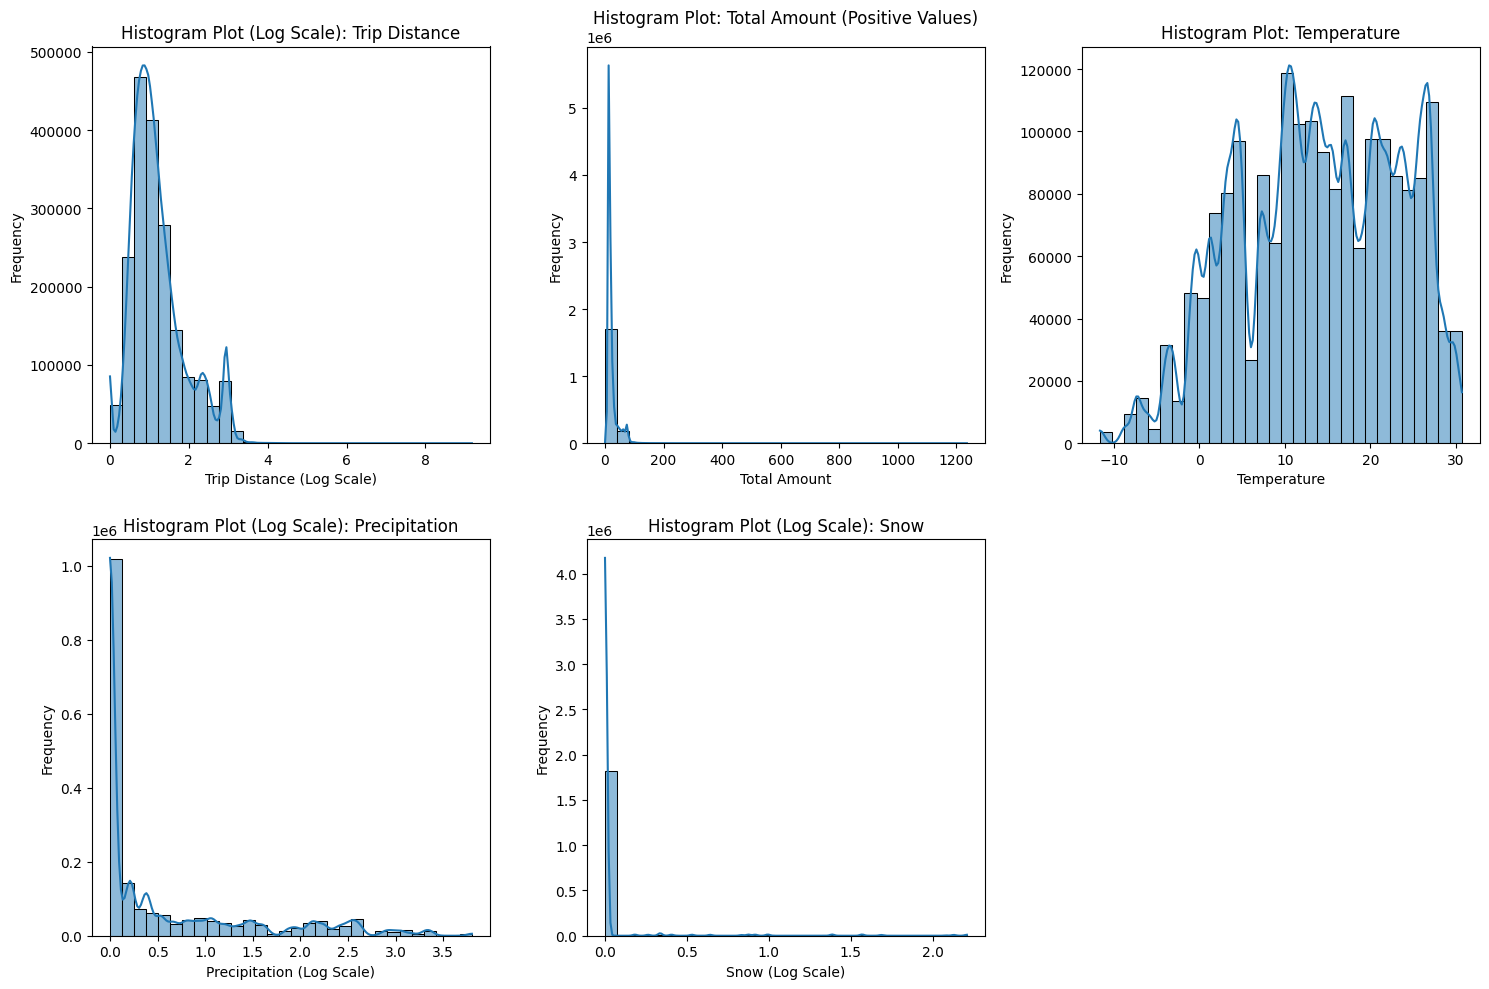

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(15, 10))

# Add a small constant to 'trip_distance' to avoid issues with log scale
merged_df_encoded['trip_distance_log'] = np.log1p(merged_df_encoded['trip_distance'])

# Add a small constant to 'precip' to avoid issues with log scale
merged_df_encoded['precip_log'] = np.log1p(merged_df_encoded['precip'])

# Add a small constant to 'snow' to avoid issues with log scale
merged_df_encoded['snow_log'] = np.log1p(merged_df_encoded['snow'])

# Histogram plot for 'trip_distance' with log scale on the x-axis
plt.subplot(2, 3, 1)
sns.histplot(merged_df_encoded['trip_distance_log'], bins=30, kde=True)
plt.title('Histogram Plot (Log Scale): Trip Distance')
plt.xlabel('Trip Distance (Log Scale)')
plt.ylabel('Frequency')

# Histogram plot for 'total_amount' focusing on positive values
plt.subplot(2, 3, 2)
sns.histplot(merged_df_encoded['total_amount'][merged_df_encoded['total_amount'] > 0], bins=30, kde=True)
plt.title('Histogram Plot: Total Amount (Positive Values)')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')

# Histogram plot for 'temp'
plt.subplot(2, 3, 3)
sns.histplot(merged_df_encoded['temp'], bins=30, kde=True)
plt.title('Histogram Plot: Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Histogram plot for 'precip' with log scale on the x-axis
plt.subplot(2, 3, 4)
sns.histplot(merged_df_encoded['precip_log'], bins=30, kde=True)
plt.title('Histogram Plot (Log Scale): Precipitation')
plt.xlabel('Precipitation (Log Scale)')
plt.ylabel('Frequency')

# Histogram plot for 'snow' with log scale on the x-axis
plt.subplot(2, 3, 5)
sns.histplot(merged_df_encoded['snow_log'], bins=30, kde=True)
plt.title('Histogram Plot (Log Scale): Snow')
plt.xlabel('Snow (Log Scale)')
plt.ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

### Now, let's categorize the data based on the following standard

### 1] taxi_fare:

Cheap: Total Amount <= Cheap Threshold = 10

Standard: Cheap Threshold = 10 < Total Amount <= Expensive Threshold = 40

Expensive: Total Amount > 40

### 2] distance:
Very Short: Trip Distance <= Short Threshold

Short: Short Threshold < Trip Distance <= Moderate Threshold

Standard: Moderate Threshold < Trip Distance <= Long Threshold

Long: Long Threshold < Trip Distance <= Extended Threshold

Very Long: Trip Distance > Extended Threshold

### 3] temp:
Very Cold: Temperature <= Chilly Threshold

Cold: Chilly Threshold < Temperature <= Moderate Threshold

Moderate: Moderate Threshold < Temperature <= Warm Threshold

Warm: Warm Threshold < Temperature <= Hot Threshold

Very Hot: Temperature > Hot Threshold

### 4] precip:
None: Precipitation <= Light Threshold

Light: Light Threshold < Precipitation <= Moderate Threshold

Moderate: Moderate Threshold < Precipitation <= Substantial Threshold

Substantial: Substantial Threshold < Precipitation <= Heavy Threshold

Heavy: Precipitation > Heavy Threshold

### 5] snow:
None: Snowfall <= Light Threshold

Light: Light Threshold < Snowfall <= Moderate Threshold

Moderate: Moderate Threshold < Snowfall <= Substantial Threshold

Substantial: Substantial Threshold < Snowfall <= Heavy Threshold

Heavy: Snowfall > Heavy Threshold

## 3.1 Categorize data based on Statistical Analysis and Graphical Representation

### Taxi Fare (Total Amount)

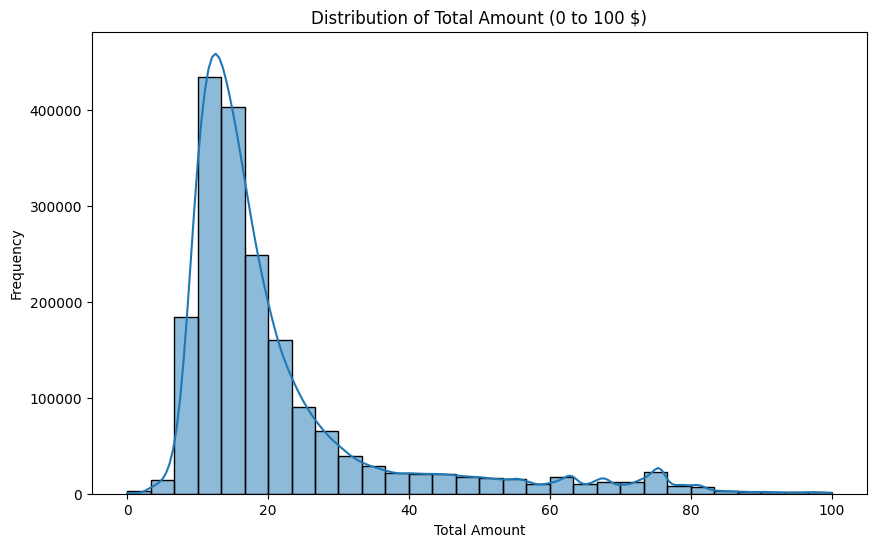

In [ ]:
# Filter data for 'total_amount' within the range 0 to 100
filtered_df_total_amount = merged_df_encoded[(merged_df_encoded['total_amount'] >= 0) & (merged_df_encoded['total_amount'] <= 100)]

# Plot a histogram of 'total_amount'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_total_amount['total_amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount (0 to 100 $)')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

### 1] taxi_fare categorization

Cheap: Total Amount <= Cheap Threshold = 10

Standard: Cheap Threshold = 10 < Total Amount <= Expensive Threshold = 40

Expensive: Total Amount > 40

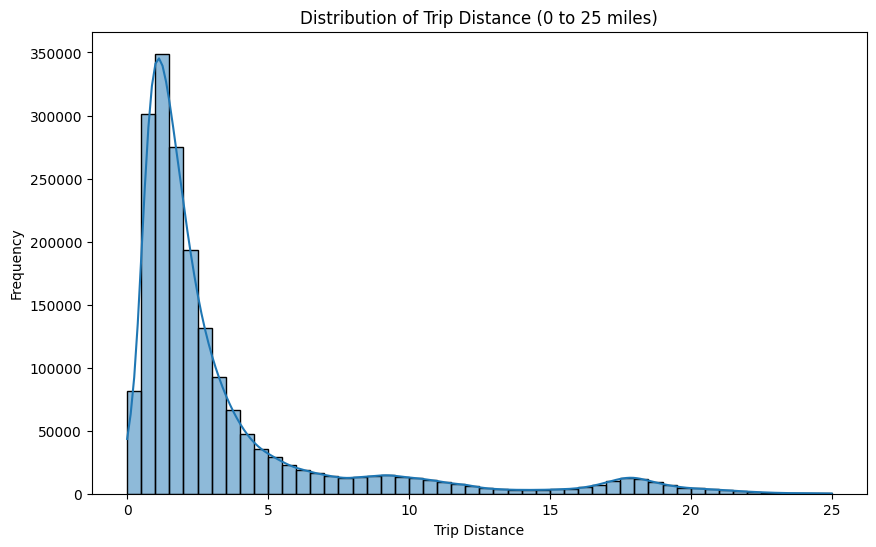

In [ ]:
# Filter data for 'trip_distance' within the range 0 to 25 (miles)
filtered_df_trip_distance = merged_df_encoded[(merged_df_encoded['trip_distance'] >= 0) & (merged_df_encoded['trip_distance'] <= 25)]

# Plot a histogram of 'trip_distance'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_trip_distance['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance (0 to 25 miles)')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

### 2] trip_distance categorization
Very Short: Trip Distance <= Short Threshold = 1

Short: Short Threshold = 1 < Trip Distance <= Moderate Threshold = 3

Standard: Moderate Threshold = 3 < Trip Distance <= Long Threshold = 5

Long: Long Threshold = 5 < Trip Distance <= Extended Threshold = 10

Very Long: Trip Distance = 10 > Extended Threshold

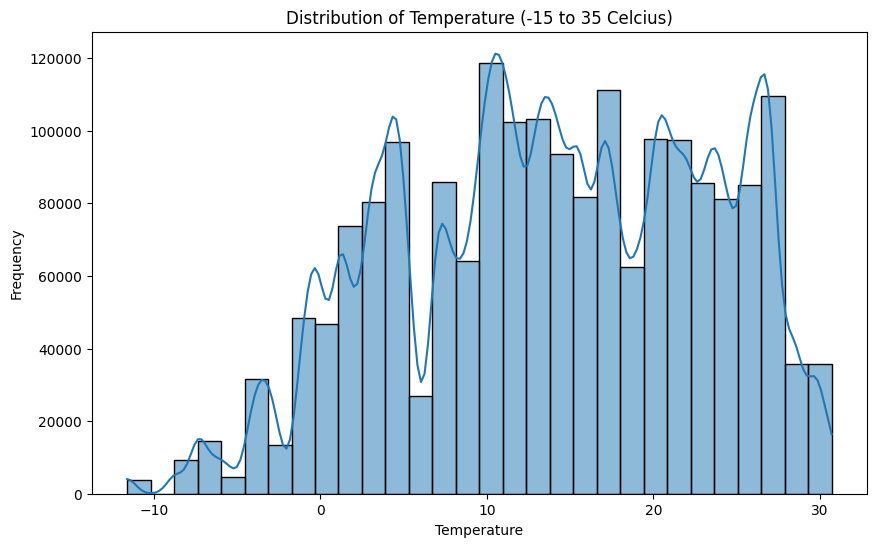

In [ ]:
# Filter data for 'temp' within the range -15 to 35 (Celcius)
filtered_df_temp = merged_df_encoded[(merged_df_encoded['temp'] >= -15) & (merged_df_encoded['temp'] <= 35)]

# Plot a histogram of 'temp'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_temp['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature (-15 to 35 Celcius)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


### 3] temp categorization
Very Cold: Temperature <= Chilly Threshold = 0

Cold: Chilly Threshold = 0 < Temperature <= Moderate Threshold = 10

Moderate: Moderate Threshold = 10 < Temperature <= Warm Threshold = 18

Warm: Warm Threshold = 18 < Temperature <= Hot Threshold = 25

Very Hot: Temperature > Hot Threshold = 25

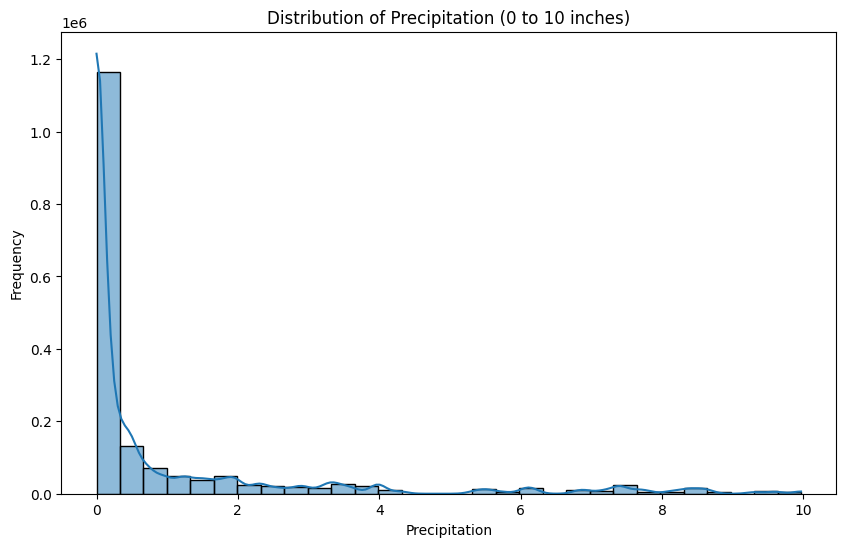

In [ ]:
# Filter data for 'precip' within the range 0 to 10 (inches)
filtered_df_precip = merged_df_encoded[(merged_df_encoded['precip'] >= 0) & (merged_df_encoded['precip'] <= 10)]

# Plot a histogram of 'precip'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_precip['precip'], bins=30, kde=True)
plt.title('Distribution of Precipitation (0 to 10 inches)')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()


### 4] precip categorization
None: Precipitation <= Light Threshold = 0.05

Light: Light Threshold = 0.05 < Precipitation <= Moderate Threshold = 0.1

Moderate: Moderate Threshold = 0.1 < Precipitation <= Substantial Threshold = 0.2

Substantial: Substantial Threshold = 0.2 < Precipitation <= Heavy Threshold = 0.3

Heavy: Precipitation > Heavy Threshold = 0.3

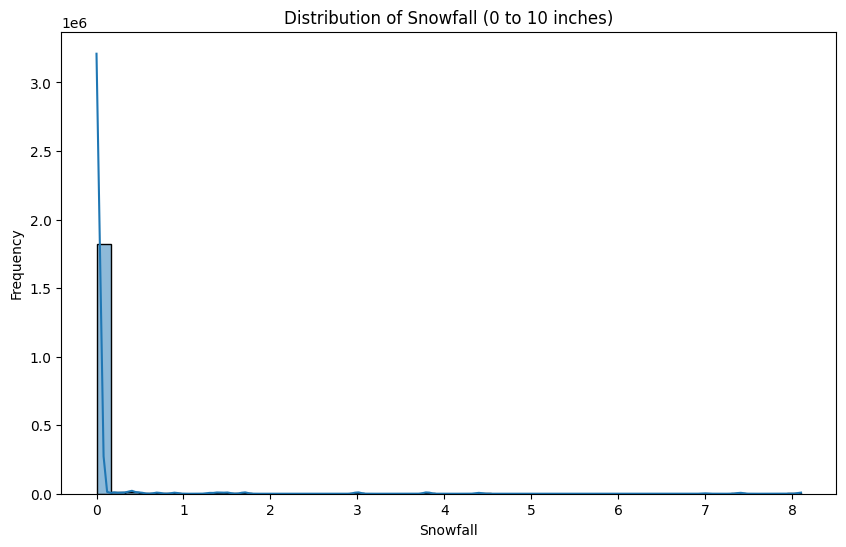

In [ ]:
# Filter data for 'snow' within the range 0 to 10 (inches)
filtered_df_snow = merged_df_encoded[(merged_df_encoded['snow'] >= 0) & (merged_df_encoded['snow'] <= 10)]

# Plot a histogram of 'snow'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_snow['snow'], bins=50, kde=True)
plt.title('Distribution of Snowfall (0 to 10 inches)')
plt.xlabel('Snowfall')
plt.ylabel('Frequency')
plt.show()

### 5] snow categorization
None: Snowfall <= Light Threshold = 1

Light: Light Threshold = 1 < Snowfall <= Moderate Threshold = 3

Moderate: Moderate Threshold = 3 < Snowfall <= Substantial Threshold = 6

Substantial: Substantial Threshold = 6 < Snowfall <= Heavy Threshold = 8

Heavy: Snowfall > Heavy Threshold = 8

### 3.2 Create new dataframe that converting the above features into categorical data

### Fisrt, implement binary classification if it works properly

In [54]:
# Assuming merged_df_encoded is your DataFrame
threshold = 20  # Set the threshold; Less than 20$ is cheap, and more than 20$ is expensive.

# Create a new column 'fare_category'
merged_df_encoded['fare_binary'] = pd.cut(
    merged_df_encoded['total_amount'],
    bins=[-float('inf'), threshold, float('inf')],
    labels=['Cheap', 'Expensive'],
    include_lowest=True
)

In [55]:
# Categorize 'trip_distance' based on specified thresholds
merged_df_encoded['trip_distance_category'] = pd.cut(
    merged_df_encoded['trip_distance'],
    bins=[-float('inf'), 1, 3, 5, 10, float('inf')],
    labels=['Very Short', 'Short', 'Standard', 'Long', 'Very Long'],
    include_lowest=True
)

# Categorize 'temp' based on specified thresholds
merged_df_encoded['temp_category'] = pd.cut(
    merged_df_encoded['temp'],
    bins=[-float('inf'), 0, 10, 18, 25, float('inf')],
    labels=['Very Cold', 'Cold', 'Moderate', 'Warm', 'Very Hot'],
    include_lowest=True
)

# Categorize 'precip' based on specified thresholds
merged_df_encoded['precip_category'] = pd.cut(
    merged_df_encoded['precip'],
    bins=[-float('inf'), 0.05, 0.1, 0.2, 0.3, float('inf')],
    labels=['None', 'Light', 'Moderate', 'Substantial', 'Heavy'],
    include_lowest=True
)

# Categorize 'snow' based on specified thresholds
merged_df_encoded['snow_category'] = pd.cut(
    merged_df_encoded['snow'],
    bins=[-float('inf'), 1, 3, 6, 8, float('inf')],
    labels=['None', 'Light', 'Moderate', 'Substantial', 'Heavy'],
    include_lowest=True
)

### Ordinal Encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder

# Use OrdinalEncoder for ordinal encoding
ordinal_encoder_features = OrdinalEncoder(categories=[
    ['Very Short', 'Short', 'Standard', 'Long', 'Very Long'],
    ['Very Cold', 'Cold', 'Moderate', 'Warm', 'Very Hot'],
    ['None', 'Light', 'Moderate', 'Substantial', 'Heavy'],
    ['None', 'Light', 'Moderate', 'Substantial', 'Heavy']
])

# Apply ordinal encoding to the specified feature columns
merged_df_encoded[['trip_distance_category', 'temp_category', 'precip_category', 'snow_category']] = ordinal_encoder_features.fit_transform(
    merged_df_encoded[['trip_distance_category', 'temp_category', 'precip_category', 'snow_category']]
)

# Use OrdinalEncoder for encoding the target variable
ordinal_encoder_target = OrdinalEncoder(categories=[['Cheap', 'Expensive']])

# Apply ordinal encoding to the target variable
merged_df_encoded['fare_binary'] = ordinal_encoder_target.fit_transform(merged_df_encoded[['fare_binary']])


In [57]:
# Display the resulting DataFrame
clf_df = merged_df_encoded # Copy the 'merged_df_encoded' into new dataframe 'clf_df' for classification task
clf_df[['total_amount', 'fare_binary', 'trip_distance', 'trip_distance_category', 'temp', 'temp_category', 'precip', 'precip_category', 'snow', 'snow_category']]

,total_amount,fare_binary,trip_distance,trip_distance_category,temp,temp_category,precip,precip_category,snow,snow_category
0,24.36,1.0,3.79,2.0,1.2,1.0,0.0,0.0,0.0,0.0
1,39.57,1.0,4.48,2.0,1.2,1.0,0.0,0.0,0.0,0.0
2,12.96,0.0,1.22,1.0,1.2,1.0,0.0,0.0,0.0,0.0
3,12.85,0.0,0.90,0.0,1.2,1.0,0.0,0.0,0.0,0.0
4,80.87,1.0,21.43,4.0,1.2,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1982772,13.80,0.0,1.92,1.0,4.1,1.0,0.0,0.0,0.0,0.0
1982773,43.80,1.0,6.79,3.0,4.1,1.0,0.0,0.0,0.0,0.0
1982774,14.30,0.0,2.00,1.0,4.1,1.0,0.0,0.0,0.0,0.0
1982775,15.96,0.0,1.63,1.0,4.1,1.0,0.0,0.0,0.0,0.0


In [19]:
clf_df.shape

(1969589, 24)

In [ ]:
# Display all column names
column_names = clf_df.columns
print(column_names)

Index(['VendorID', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'taxes', 'tip_amount', 'total_amount', 'pickup_date',
       'dropoff_date', 'datetime', 'temp', 'precip', 'snow',
       'weather_clear-day', 'weather_cloudy', 'weather_partly-cloudy-day',
       'weather_rain', 'weather_snow', 'fare_binary', 'trip_distance_category',
       'temp_category', 'precip_category', 'snow_category'],
      dtype='object')


### Drop the irrelevant columns and non-categorized features

In [58]:
# Drop specified columns to implement classification task
columns_to_drop = ['VendorID', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'taxes', 'tip_amount', 'total_amount', 'pickup_date',
       'dropoff_date', 'datetime', 'temp', 'precip', 'snow']
clf_df = clf_df.drop(columns=columns_to_drop)

In [ ]:
# Display the resulting DataFrame
clf_df.head()

,weather_clear-day,weather_cloudy,weather_partly-cloudy-day,weather_rain,weather_snow,fare_binary,trip_distance_category,temp_category,precip_category,snow_category,fare_multi
0,1,0,0,0,0,1.0,2.0,1.0,0.0,0.0,Standard
2,1,0,0,0,0,0.0,1.0,1.0,0.0,0.0,Standard
3,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,Standard
4,1,0,0,0,0,1.0,4.0,1.0,0.0,0.0,Expensive
5,1,0,0,0,0,1.0,2.0,1.0,0.0,0.0,Standard


### Final columns that we need to implement decision tree

In [ ]:
clf_df.columns

Index(['weather_clear-day', 'weather_cloudy', 'weather_partly-cloudy-day',
       'weather_rain', 'weather_snow', 'fare_binary', 'trip_distance_category',
       'temp_category', 'precip_category', 'snow_category'],
      dtype='object')

## 4. Implement Decision Tree (on Binary Classification Task)

In [26]:
from sklearn.model_selection import train_test_split # Used to split the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Metrics for evaluating the model
from sklearn.preprocessing import OneHotEncoder # Used One-Hot-Encoding categorical features

# Define features (X) and target variable (y)
X = clf_df[['trip_distance_category', 'temp_category', 'precip_category', 'snow_category']]
y = clf_df['fare_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9050

Confusion Matrix:
[[249511  12677]
 [ 24752 106978]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93    262188
         1.0       0.89      0.81      0.85    131730

    accuracy                           0.90    393918
   macro avg       0.90      0.88      0.89    393918
weighted avg       0.90      0.90      0.90    393918



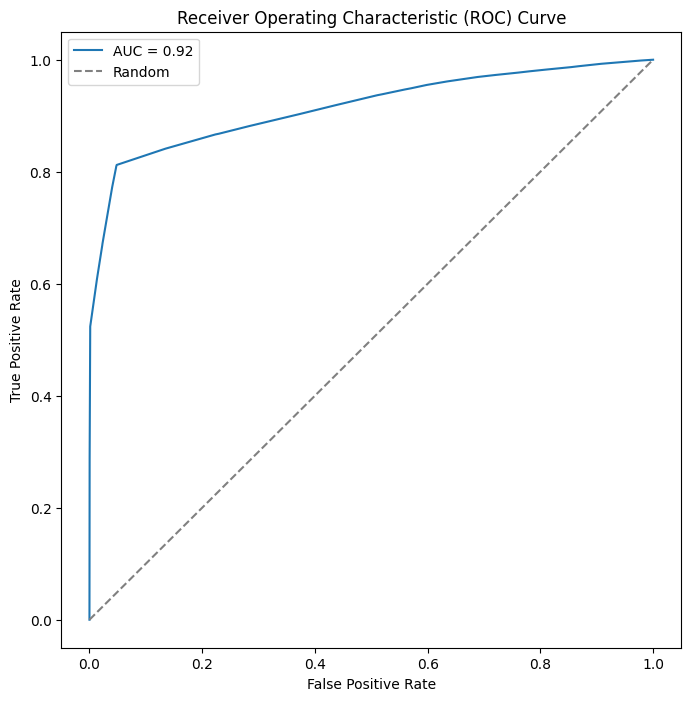

AUC-ROC: 0.92


In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make predictions on the test data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Display the AUC-ROC value
print(f"AUC-ROC: {auc_roc:.2f}")

## 5. Decision Tree on Multiclass Classification Task
### To implement multi-class classification task, we categorize the target variable more in detail

In [59]:
clf_multi_df = clf_df.copy() # Copy the 'clf_df into new dataframe 'clf_df_multi' for classification task

In [60]:
# Create a new column 'fare_multi'
merged_df_encoded['fare_multi'] = pd.cut(
    merged_df_encoded['total_amount'],
    bins=[-float('inf'), 10, 40, float('inf')],
    labels=['Cheap', 'Standard','Expensive'],
    include_lowest=True
)

In [61]:
# Add 'fare_multi' column to clf_multi_df
clf_multi_df['fare_multi'] = pd.cut(
    merged_df_encoded['total_amount'],
    bins=[-float('inf'), 10, 25, float('inf')],
    labels=['Cheap', 'Standard', 'Expensive'],
    include_lowest=True
)

In [62]:
# Drop the 'fare_binary' column
clf_multi_df.drop('fare_binary', axis=1, inplace=True)

In [ ]:
clf_multi_df.columns

Index(['weather_clear-day', 'weather_cloudy', 'weather_partly-cloudy-day',
       'weather_rain', 'weather_snow', 'trip_distance_category',
       'temp_category', 'precip_category', 'snow_category', 'fare_multi'],
      dtype='object')

In [ ]:
clf_multi_df.head()

,weather_clear-day,weather_cloudy,weather_partly-cloudy-day,weather_rain,weather_snow,trip_distance_category,temp_category,precip_category,snow_category,fare_multi
0,1,0,0,0,0,2.0,1.0,0.0,0.0,Standard
2,1,0,0,0,0,1.0,1.0,0.0,0.0,Standard
3,1,0,0,0,0,0.0,1.0,0.0,0.0,Standard
4,1,0,0,0,0,4.0,1.0,0.0,0.0,Expensive
5,1,0,0,0,0,2.0,1.0,0.0,0.0,Standard


### Ordinal Encoding for fare_multi

In [63]:
# Use OrdinalEncoder for encoding the target variable
ordinal_encoder_target = OrdinalEncoder(categories=[['Cheap','Standard','Expensive']])

In [64]:
# Apply ordinal encoding to the target variable
clf_multi_df['fare_multi'] = ordinal_encoder_target.fit_transform(clf_multi_df[['fare_multi']])

In [ ]:
# Display the resulting DataFrame
clf_multi_df['fare_multi'].head()

0    1.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: fare_multi, dtype: float64

In [ ]:
clf_multi_df.columns

Index(['weather_clear-day', 'weather_cloudy', 'weather_partly-cloudy-day',
       'weather_rain', 'weather_snow', 'trip_distance_category',
       'temp_category', 'precip_category', 'snow_category', 'fare_multi'],
      dtype='object')

### Implement Decision Tree on Multi-class Classification

In [65]:
from sklearn.model_selection import train_test_split # Used to split the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Metrics for evaluating the model
from sklearn.preprocessing import OneHotEncoder # Used One-Hot-Encoding categorical features

In [ ]:
# Define features (X) and target variable (y)
X = clf_multi_df[['trip_distance_category', 'temp_category', 'precip_category', 'snow_category']]
y = clf_multi_df['fare_multi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8365

Confusion Matrix:
[[   882  39020     62]
 [   760 263332   3753]
 [    45  20763  65301]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.02      0.04     39964
         1.0       0.81      0.98      0.89    267845
         2.0       0.94      0.76      0.84     86109

    accuracy                           0.84    393918
   macro avg       0.76      0.59      0.59    393918
weighted avg       0.81      0.84      0.79    393918



### Interpretation
**Accuracy:**

Accuracy: 0.8365
Interpretation: The model achieved an overall accuracy of approximately 83.65%, meaning it correctly predicted the class labels for this percentage of instances.

**Confusion Matrix:**
Interpretation:
Rows represent the actual classes ('Cheap', 'Standard', 'Expensive').
Columns represent the predicted classes.
The confusion matrix shows the distribution of correct and incorrect predictions.

Example: In the 'Cheap' class, 882 instances were correctly predicted, 39020 instances were incorrectly predicted as 'Standard', and 62 instances were incorrectly predicted as 'Expensive'.

- **Interpretation:**
  - **Precision:**
    - For the 'Cheap' class, 52% precision means that out of all instances predicted as 'Cheap', only 52% were correct.
    - For the 'Standard' class, 81% precision indicates high accuracy in predicting 'Standard' instances.
    - For the 'Expensive' class, 94% precision suggests a high accuracy in predicting 'Expensive' instances.
  - **Recall:**
    - For the 'Cheap' class, 2% recall means that only 2% of actual 'Cheap' instances were correctly predicted.
    - For the 'Standard' class, 98% recall indicates that 98% of actual 'Standard' instances were correctly predicted.
    - For the 'Expensive' class, 76% recall suggests that 76% of actual 'Expensive' instances were correctly predicted.
  - **F1-Score:**
    - F1-score is the harmonic mean of precision and recall.
    - For the 'Cheap' class, the low F1-score (0.04) indicates challenges in balancing precision and recall for this class.
    - For the 'Standard' and 'Expensive' classes, high F1-scores (0.89 and 0.84) suggest a good balance between precision and recall for these classes.
- **Overall Evaluation:**
  - The model has high accuracy, but the class-specific metrics provide more insight into its performance.
  - Precision, recall, and F1-score vary across classes, emphasizing the need to consider each class independently.

4. **Summary:**
- The model is particularly strong in predicting the 'Standard' class, with high precision, recall, and F1-score.
- Challenges exist in predicting the 'Cheap' class, as reflected in low precision, recall, and F1-score.
- The overall accuracy is good, but it's essential to analyze class-specific metrics for a comprehensive evaluation.
- Consider further tuning or exploring different modeling approaches to address challenges in predicting specific classes.










## 6. Random Forest Classifier
### Improve Model's Performance using Random Forest Classifier (Ensemble Method)

### To enhance our model's predictive performance, we chose to implement a Random Forest Classifier instead of relying solely on a single Decision Tree. This decision is rooted in the Random Forest's ability to overcome the limitations associated with overfitting by aggregating predictions from multiple trees. Beyond achieving higher accuracy, the Random Forest offers advantages such as robustness to outliers, effective handling of missing values, and the provision of a feature importance ranking for better interpretability. Its versatility in addressing both classification and regression tasks, along with the efficiency gained through parallelization for faster training on large datasets, further supports its suitability for our project. The Random Forest's capacity to reduce bias, maintain stability across diverse datasets, and provide a range of hyperparameters for fine-tuning makes it a robust and versatile choice to elevate our model's overall performance.

### To identify optimal hyperparameters, we employed the GridSearchCV method. Initially, our model underwent testing with variations in 'min_samples_split,' 'min_samples_leaf,' and 'n_estimators' as outlined below:

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target variable (y)
X = clf_multi_df[['trip_distance_category', 'temp_category', 'precip_category', 'snow_category']]
y = clf_multi_df['fare_multi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [20],
    'max_depth': [None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=0, **best_params)

# Train the classifier on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=1)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Print the evaluation metrics for Random Forest
print("\nRandom Forest Classifier with Best Hyperparameters:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

Random Forest Classifier with Best Hyperparameters:
Accuracy: 0.8354

Confusion Matrix:
[[   919  39416     67]
 [   747 262983   3816]
 [    55  20751  65164]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.02      0.04     40402
         1.0       0.81      0.98      0.89    267546
         2.0       0.94      0.76      0.84     85970

    accuracy                           0.84    393918
   macro avg       0.76      0.59      0.59    393918
weighted avg       0.81      0.84      0.79    393918



### Upon reviewing the results, we observed that the model attains optimal performance when 'min_samples_split' is set to 2 and 'min_samples_leaf' is set to 1. Consequently, we chose to augment the number of decision trees by increasing 'n_estimators' to 200.

In [29]:
# Define features (X) and target variable (y)
X = clf_multi_df[['trip_distance_category', 'temp_category', 'precip_category', 'snow_category']]
y = clf_multi_df['fare_multi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier_2 = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state = 0)

# Train the classifier on the training data
rf_classifier_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier_2.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=1)

# Print the evaluation metrics for Random Forest
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

Random Forest Classifier:
Accuracy: 0.8364

Confusion Matrix:
[[   947  39429     55]
 [   793 263487   3737]
 [    58  20392  65020]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.02      0.04     40431
         1.0       0.81      0.98      0.89    268017
         2.0       0.94      0.76      0.84     85470

    accuracy                           0.84    393918
   macro avg       0.76      0.59      0.59    393918
weighted avg       0.81      0.84      0.79    393918



### Despite our anticipation that the Random Forest Classifier would enhance the model's performance, the result illustrates that it does not exhibit a significant difference compared to a single decision tree.

### The observed lack of improvement with Random Forests could be attributed to the critical reliance of their effectiveness on proper hyperparameter tuning. If the hyperparameters are not optimized correctly, the ensemble might not surpass the performance of a single decision tree. Crucial parameters, including the number of trees ('n_estimators'), minimum samples split ('min_samples_split'), and minimum samples leaf ('min_samples_leaf'), require meticulous fine-tuning.

### However, it's important to note that tuning hyperparameters posed challenges in several cases due to limitations in computing resources. In light of this constraint, rather than persisting with hyperparameter tuning, we made the decision to transition to the implementation of a deep neural network, specifically a Recurrent Neural Network.



## 7. Recurrent Neural Network

### To improve the performance, let's consider the RNN (Recurrent Neural Network) since we have temporal feature, datetime, which is sequential information. RNN is appropriate method to predict the seasonal information.

### In opting for RNN (Recurrent Neural Network) over Random Forest Classifier to enhance model performance, we leverage the temporal and sequential nature of our dataset, highlighted by the 'datetime' feature. RNNs excel in capturing dependencies over time, making them well-suited for analyzing temporal and sequential data. The presence of temporal patterns enhances their appeal, especially when predicting outcomes influenced by time-related factors.

### A key advantage of RNNs lies in their ability to handle variable-length input sequences, accommodating irregular patterns in 'datetime' intervals. This flexibility contrasts with the fixed-size input requirement of Random Forest.

### RNNs further stand out in feature extraction and representation. Their capacity to automatically learn hierarchical features from sequential data offers a nuanced understanding of complex temporal relationships within 'datetime' information, surpassing traditional ensemble methods like Random Forest.

### Considering the deep learning capability of RNNs, particularly valuable in handling high complexity and non-linearity, we anticipate superior pattern learning compared to the ensemble approach of Random Forest.


In [66]:
merged_df_encoded.columns # Confirm merged_df column data

Index(['VendorID', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'taxes', 'tip_amount', 'total_amount', 'pickup_date',
       'dropoff_date', 'datetime', 'temp', 'precip', 'snow',
       'weather_clear-day', 'weather_cloudy', 'weather_partly-cloudy-day',
       'weather_rain', 'weather_snow', 'fare_binary', 'trip_distance_category',
       'temp_category', 'precip_category', 'snow_category', 'fare_multi'],
      dtype='object')

In [67]:
merged_df_encoded['datetime'] # confirm datetime column information

0         2022-12-14
1         2022-12-14
2         2022-12-14
3         2022-12-14
4         2022-12-14
             ...    
1982772   2022-02-02
1982773   2022-02-02
1982774   2022-02-02
1982775   2022-02-02
1982776   2022-02-02
Name: datetime, Length: 1969589, dtype: datetime64[ns]

In [68]:
rnn_df = merged_df_encoded # copy it into new dataframe

In [69]:
# Drop specified columns to implement RNN
columns_to_drop = ['VendorID', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'taxes', 'tip_amount', 'total_amount', 'pickup_date',
       'dropoff_date', 'temp', 'precip', 'snow']
rnn_df = rnn_df.drop(columns=columns_to_drop)

In [70]:
rnn_df.columns # Column information of rnn_df

Index(['datetime', 'weather_clear-day', 'weather_cloudy',
       'weather_partly-cloudy-day', 'weather_rain', 'weather_snow',
       'fare_binary', 'trip_distance_category', 'temp_category',
       'precip_category', 'snow_category', 'fare_multi'],
      dtype='object')

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'fare_multi' is the target column
label_encoder = LabelEncoder()

# Fit on the entire dataset to ensure consistent encoding
label_encoder.fit(rnn_df['fare_multi'])

# Convert data to PyTorch tensors
X = torch.tensor(rnn_df[['trip_distance_category', 'temp_category', 'precip_category', 'snow_category']].values, dtype=torch.float32)
y = torch.tensor(label_encoder.transform(rnn_df['fare_multi']), dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader for training and testing sets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Define batch size
batch_size = 64

# Create DataLoaders
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the model
input_size = 4  # Number of features
hidden_size = 32  # Number of hidden units in the RNN
num_classes = len(label_encoder.classes_)  # Number of output classes
model = SimpleRNN(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))  # Add an extra dimension for the sequence length
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs.unsqueeze(1))  # Add an extra dimension for the sequence length
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')


Epoch [1/5], Loss: 0.4752
Epoch [2/5], Loss: 0.5562
Epoch [3/5], Loss: 0.2289
Epoch [4/5], Loss: 0.4990
Epoch [5/5], Loss: 0.2752
Test Accuracy: 0.8627


### By using RNN deep neural network structure, we finally achieved 86.3% accuracy which is approximately 3% higher performance than a Decision Tree Method.

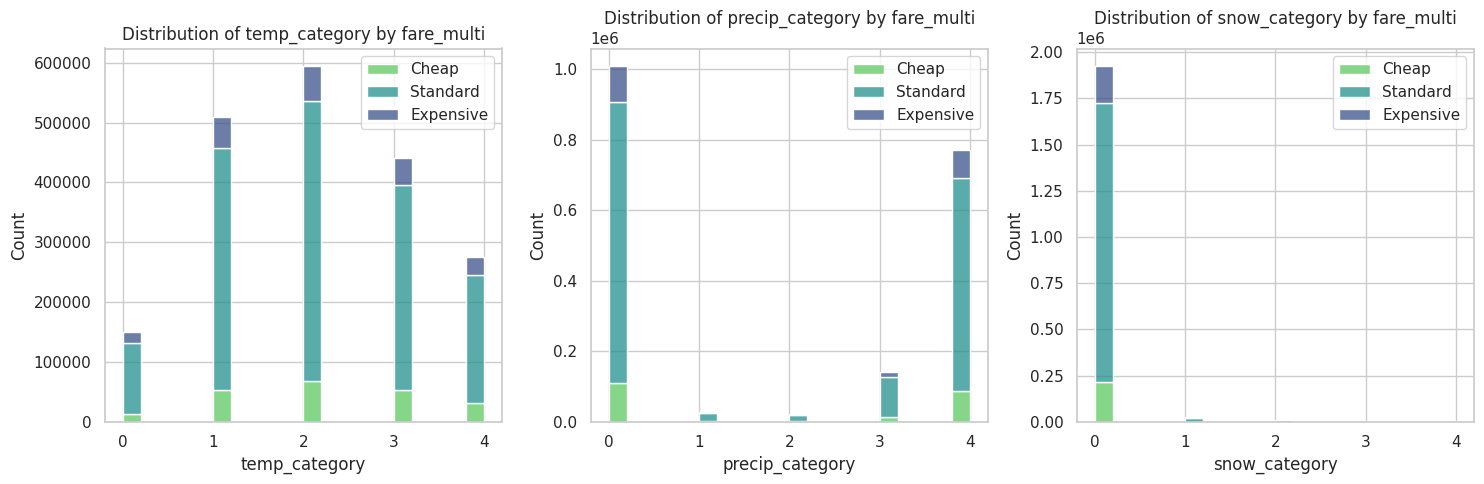

In [ ]:
# Features and target variable
features = ['temp_category', 'precip_category', 'snow_category']
target_variable = 'fare_multi'

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Set labels for legend
labels = ['Cheap', 'Standard', 'Expensive']

# Plot for each feature
for i, feature in enumerate(features):
    sns.histplot(data=rnn_df, x=feature, hue=target_variable, multiple="stack", ax=axes[i], bins=20,
                 legend=True, palette='viridis')

    axes[i].set_title(f'Distribution of {feature} by {target_variable}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

    # Move the legend to the top right
    axes[i].legend(labels=labels, loc='upper right')

plt.tight_layout()
plt.show()

## 8. Conclusion: Correlation between Weather condition and Taxi fare
### In conclusion, our endeavor to develop a taxi fare prediction model based on weather conditions has yielded successful results through the implementation of three distinct methods: Decision Tree, Random Forest Classifier, and Recurrent Neural Network.

### Interestingly, contrary to our initial expectations, our analysis reveals that weather conditions do not exert a significant impact on taxi fares. Surprisingly, even during adverse weather conditions such as heavy rain, taxi fares do not exhibit a substantial increase compared to instances without rain. This unexpected finding suggests that weather conditions alone do not establish a clear and distinct relationship with taxi fares, as visually depicted in the last figure.

### These insights shed light on the nuanced nature of the factors influencing taxi fares, highlighting the need for a comprehensive understanding beyond weather conditions. Moving forward, our findings encourage further exploration into additional variables and intricate patterns that contribute to the dynamics of taxi fare prediction. Overall, our study provides valuable insights into the complexities of taxi fare determinants and sets the stage for future research in this domain.
